In [9]:
# Policy gradient with cartpole model. 
import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make('CartPole-v0')
# observation 4, action 0 or 1

# REINFORCE algorithm, update distribution parameters after one episode
theta = np.random.random([4])
gamma = 0.95
alpha = 0.01
steplog = []
for episode in range(10000):
    slog = []
    alog = []
    rlog = []
    plog = []
    env.reset()
    action = env.action_space.sample()
    s, r, d, info = env.step(action)
    for step in range(200):
        # sigmoid
        #prob = np.exp(np.dot(s, theta))/np.sum(np.exp(np.dot(s, theta)))
        prob = 1.0/(1.0 + np.exp(np.dot(s, theta)))
        # choose action by probability
        if prob > 0.5:
            action = 1
        else:
            action = 0
        
        s, r, d, info = env.step(action)
        plog.append(prob)
        slog.append(s)
        alog.append(action)
        rlog.append(r)   
        
        #env.render()
        
        if d:
            break

    # calculate return v
    v = np.zeros([len(rlog)])
    v[-1] = rlog[-1]
    for i in range(len(rlog)):
        v[-i-1] = rlog[-i-1] + gamma * v[-i]
    # normalize return v
    v -= np.mean(v)
    v /= np.std(v)
        
    # reinforce update parameter theta
    for i in range(len(rlog)):
        #dtheta1 = alpha * slog[i] * (1 - plog[i][a]) * v[i]
        dtheta = alpha * slog[i] * (plog[i] - 1)
        theta += dtheta
    
    steplog.append(step)
print 'Training Done!'

[2017-07-09 21:37:19,361] Making new env: CartPole-v0


Training Done!


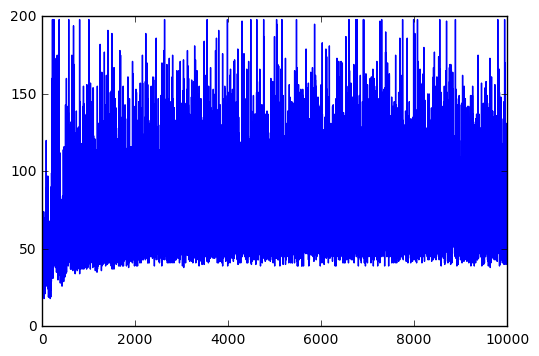

In [10]:
plt.plot(steplog)
plt.show()

In [4]:
alpha * slog[i] * (1 - plog[i])

array([-0.00015685,  0.00166069,  0.0001722 , -0.00272165])

In [ ]:
import numpy as np
for i in range(1):
    env.render()
    action = env.action_space.sample()
    s, r, d, info = env.step(action)
    
theta = np.random.random([4,2])
np.dot(s, theta)